In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from random import randint, choice
from tqdm import tqdm, trange
import time
import imageio

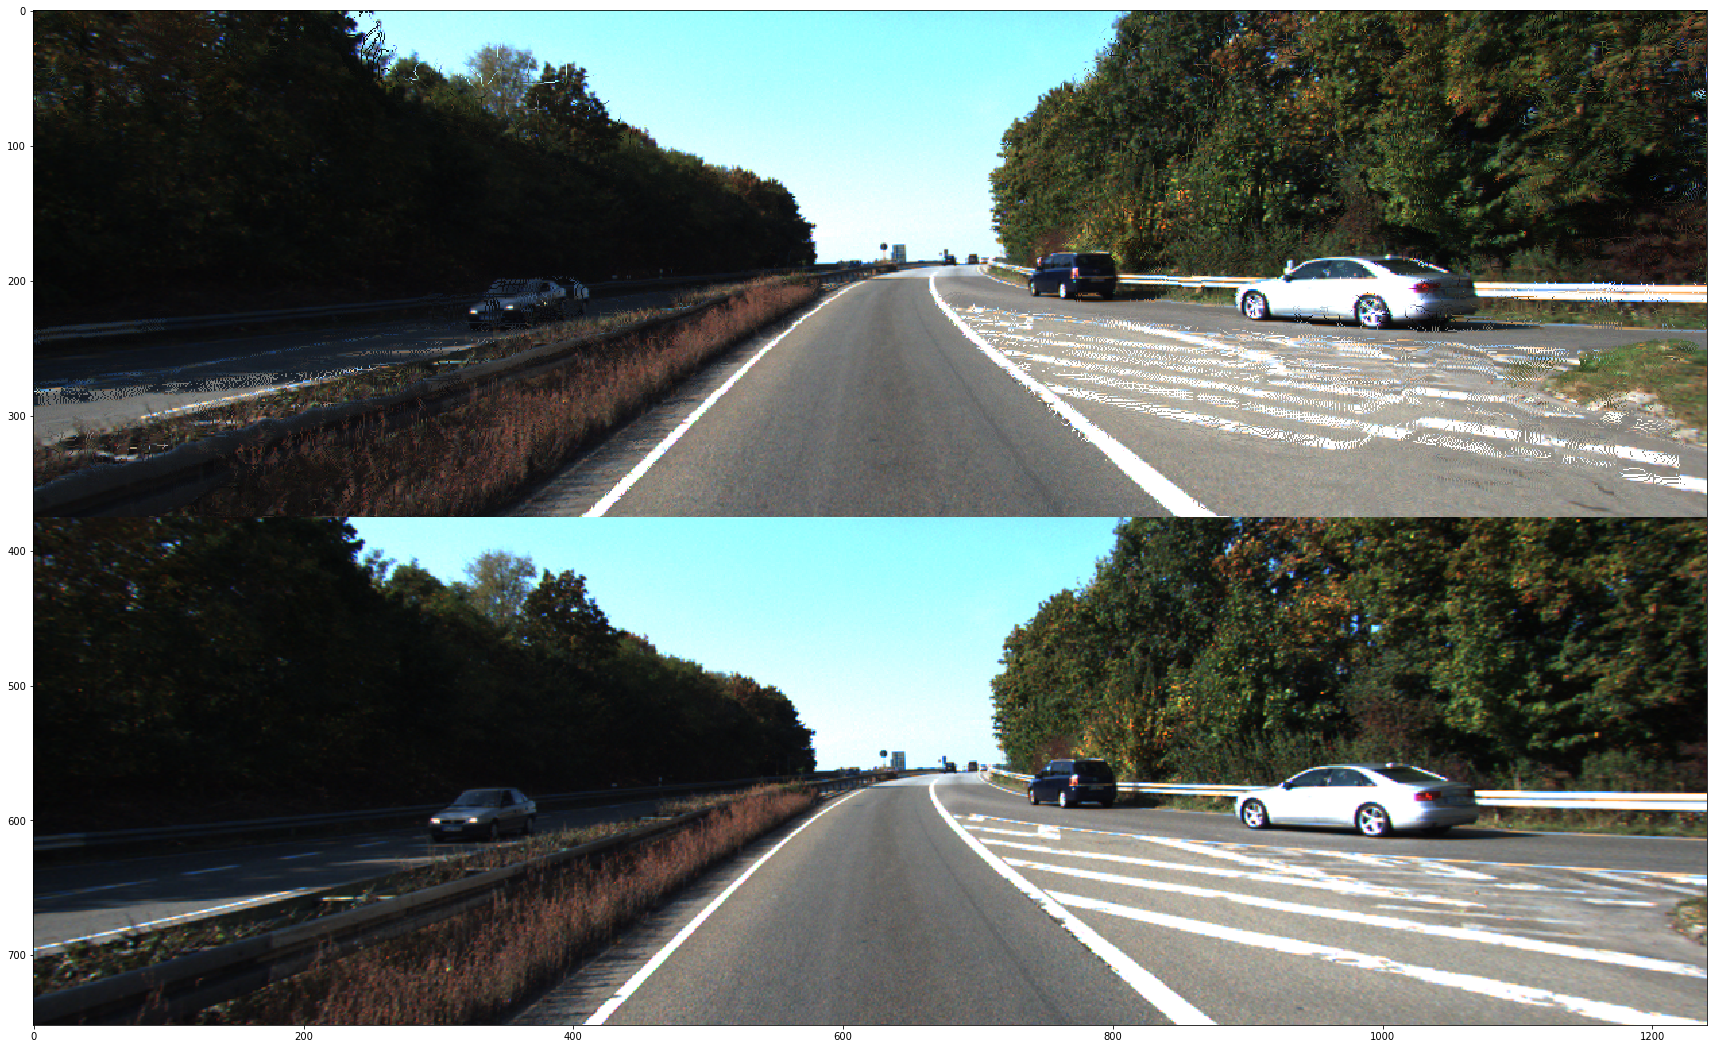

In [2]:
imgf = plt.imread("01.png")
imgs = plt.imread("02.png")

img_prev = np.array(cv.cvtColor(imgf, cv.COLOR_RGB2GRAY)*255, dtype=np.uint8)
img_next = np.array(cv.cvtColor(imgs, cv.COLOR_RGB2GRAY)*255, dtype=np.uint8)


# # params for ShiTomasi corner detection
# feature_params = dict( maxCorners = 100,
#                        qualityLevel = 0.3,
#                        minDistance = 7,
#                        blockSize = 7 )

# # Parameters for lucas kanade optical flow
# lk_params = dict( winSize  = (15,15),
#                   maxLevel = 2,
#                   criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# p0 = cv.goodFeaturesToTrack(img_prev, mask = None, **feature_params)
# p1, st, err = cv.calcOpticalFlowPyrLK(img_prev,img_next, p0, None, **lk_params)
# good_new = p1[st==1]
# good_old = p0[st==1]

# for i,(new,old) in enumerate(zip(good_new,good_old)):
#     a,b = new.ravel()
#     c,d = old.ravel()
#     print(a,b,c,d)
#     res[int(d), int(c)] = res[int(b), int(a)]

flow = cv.calcOpticalFlowFarneback(img_prev,img_next, flow=None, pyr_scale=0.5, levels=3, winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
# flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

res = imgf.copy()
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        x = int(flow[i,j,0])
        y = int(flow[i,j,1])
        res[max(min(i + y, res.shape[0] - 1), 0), max(min(j + x, res.shape[1] - 1), 0)] = imgf[i, j]

res1 = np.array(np.concatenate((imgf, imgf), axis=0) * 255, dtype=np.uint8)
res2 = np.array(np.concatenate((res, imgs), axis=0) * 255, dtype=np.uint8)
plt.figure(figsize=(30, 30))
plt.imshow(res2)
# plt.figure(figsize=(30, 30))
# plt.imshow(imgs)
flow[0, 0]
np.concatenate

images = []
for i in range(3):
    images.append(res1)
for i in range(3):
    images.append(res2)
imageio.mimsave('./flow.gif', images)
plt.imsave("im5.png", res)

<div dir="rtl">
همانگونه که گفته شد از کتابخانه اوپن سی وی برای یافتن شار نوری استفاده کردیم و هر نقطه را طبق خروجی کتابخانه، به محل مورد نظرش انتقال دادیم و در یک گیف ذخیره کردیم
</div>